## Python code 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import medfilt
from imblearn.over_sampling import SMOTE
from scipy.signal import savgol_filter
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

In [2]:
df=pd.read_csv('exoTrain.csv')

In [3]:
df2=pd.read_csv('exoTest.csv')

In [4]:
df.shape

(5087, 3198)

In [5]:
df.head()

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08     -39.54  
1      -4.86       0.76     -11.70       6.46      16.00      19.93  
2     -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3      20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4    -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  

[5 rows x 3198 columns]

In [6]:
df.isna().sum().value_counts() # checking missing values

0    3198
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [8]:
df["LABEL"].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

## Comments
##### 1. Each row is a star with columns showing intesities at different times.
##### 2. There are over 3000 columns. Dataset has a large dimensionality.
##### 3. There are no categorical columns. Label is integer type and all other are  float.
##### 4. There are no missing values.
##### 5. There are more than 5000 stars in the dataset.
##### 6. There are 37 stars with exoplanets and 5050 stars with no exoplanets
##### 7. This is a binary classification problem. We will use corresponding algortihms like Logistic Regression, Decision Trees, Random Forest Classifier etc .

## Exploratory Data Analysis (EDA) 

### Basic Statistics

In [9]:
# storing LABEL column in another varialbe
labels=df["LABEL"]

# splitting into exoplanet stars and non exoplanet stars. Stars with label 2 have exoplanets.
exoplanet_stars=df[df["LABEL"]==2].copy(deep=True)
non_exoplanet_stars=df[df["LABEL"]==1].copy(deep=True)

# dropping LABEL for all data frames
df.drop("LABEL",axis=1,inplace=True)
exoplanet_stars.drop("LABEL",axis=1,inplace=True)
non_exoplanet_stars.drop("LABEL",axis=1,inplace=True)


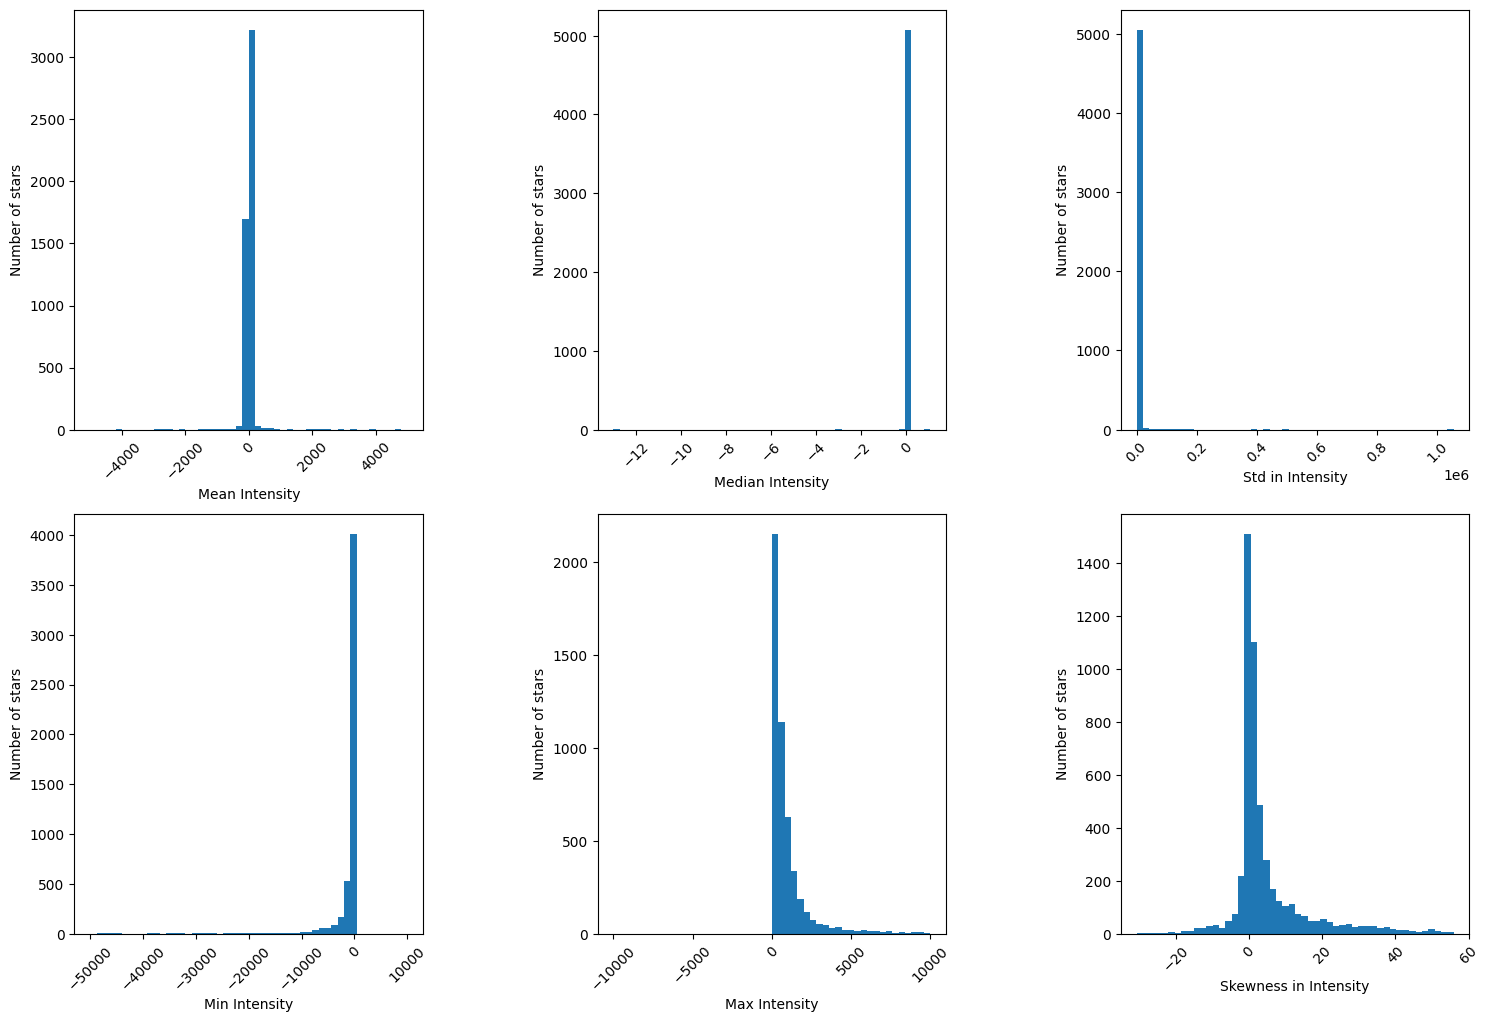

In [10]:
plt.figure(figsize=(18,12)) # defining figure size
plt.subplots_adjust(wspace=0.5) # giving space between plots



# plotting distribution of mean intensities
plt.subplot(2,3,1)
plt.hist(df.mean(axis=1),bins=50,range=(-5000,5000));
plt.xlabel('Mean Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation =45);


# plotting distribution of median intensities
plt.subplot(2,3,2)
plt.hist(df.median(axis=1),bins=50);
plt.xlabel('Median Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation =45);


# plotting distribution of std of intensities
plt.subplot(2,3,3)
plt.hist(df.std(axis=1),bins=50);
plt.xlabel('Std in Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation=45);


# plotting distribution of min intensities
plt.subplot(2,3,4)
plt.hist(df.min(axis=1),bins=50,range=(-50000,10000));
plt.xlabel('Min Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation=45);


# plotting distribution of max intensities
plt.subplot(2,3,5)
plt.hist(df.max(axis=1),bins=50,range=(-10000,10000));
plt.xlabel('Max Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation=45);


# plotting distribution of min intensities
plt.subplot(2,3,6)
plt.hist(df.skew(axis=1),bins=50);
plt.xlabel('Skewness in Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation=45);

##### Lets plot this data with exoplanet stars and non exoplanet stars

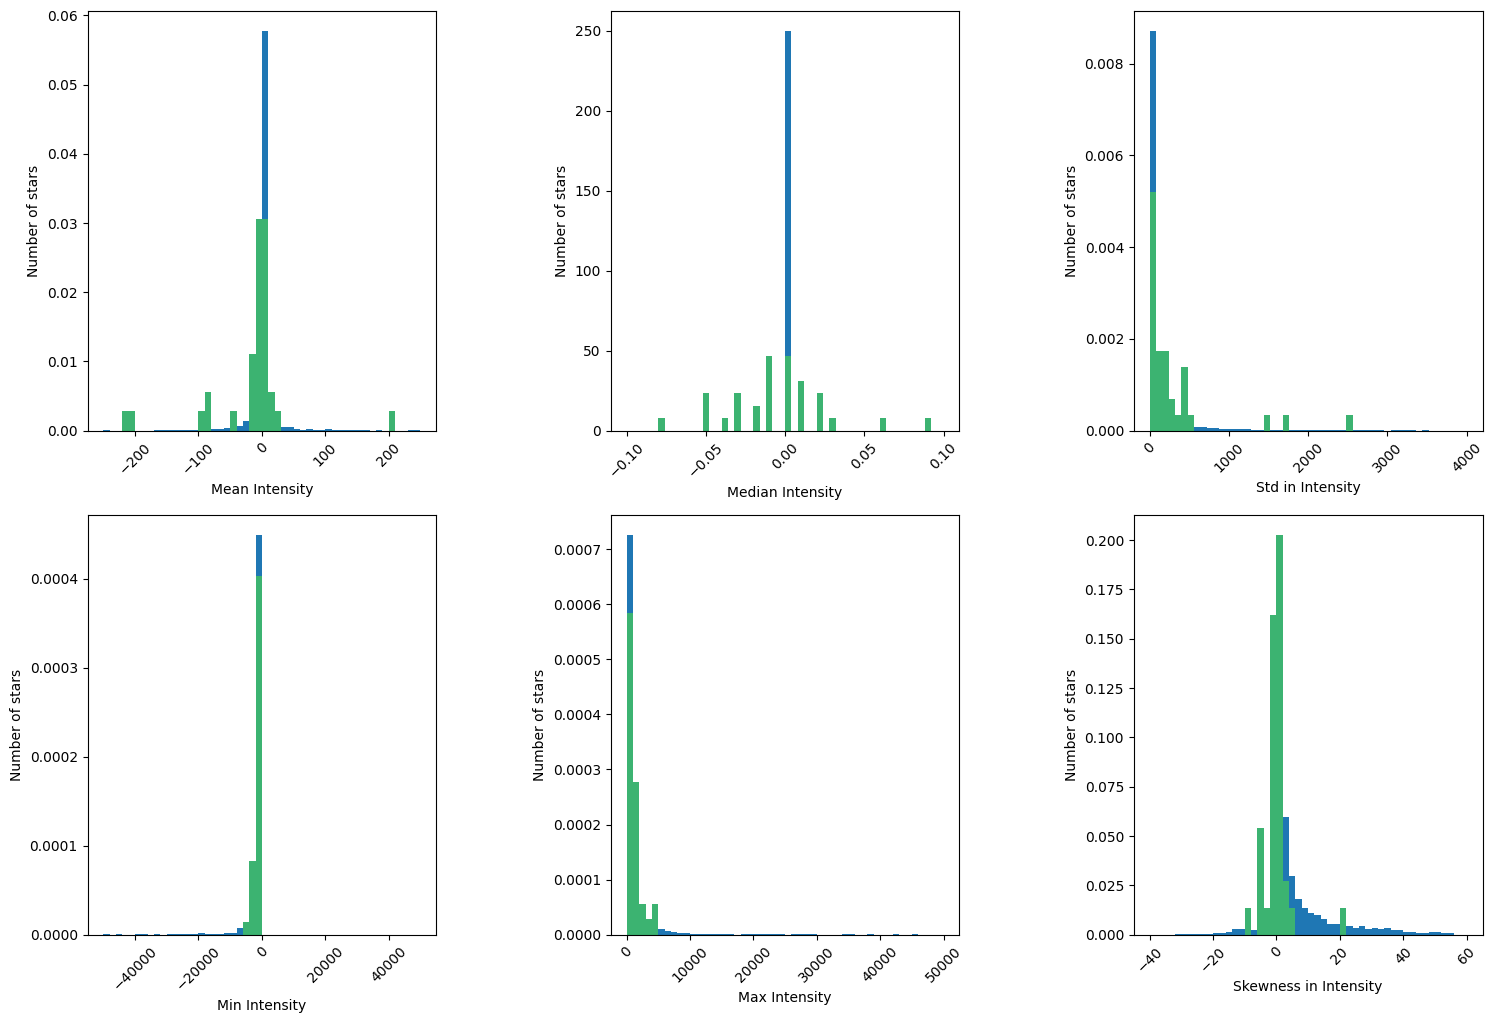

In [11]:
plt.figure(figsize=(18,12)) # defining figure size
plt.subplots_adjust(wspace=0.5) # giving space between plots

# The density parameter normalises the data to form a probability distribution as exoplanet stars are too less in number 
# compared to non exoplanet stars

# plotting distribution of mean intensities
plt.subplot(2,3,1)

plt.hist(non_exoplanet_stars.mean(axis=1),bins=50,range=(-250,250),density=True);
plt.hist(exoplanet_stars.mean(axis=1),bins=50,range=(-250,250),color='mediumseagreen',density=True)

plt.xlabel('Mean Intensity')
plt.ylabel('Number of stars')

plt.xticks(rotation =45);


# plotting distribution of median intensities
plt.subplot(2,3,2)

plt.hist(non_exoplanet_stars.median(axis=1),bins=50,range=(-0.1,0.1),density=True);
plt.hist(exoplanet_stars.median(axis=1),bins=50,range=(-0.1,0.1),color='mediumseagreen',density=True)

plt.xlabel('Median Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation =45);



# plotting distribution of std in intensities
plt.subplot(2,3,3)

plt.hist(non_exoplanet_stars.std(axis=1),bins=50,density=True,range=(0,4000));
plt.hist(exoplanet_stars.std(axis=1),bins=50,color='mediumseagreen',density=True,range=(0,4000))

plt.xlabel('Std in Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation =45);



# plotting distribution of minimum intensities
plt.subplot(2,3,4)

plt.hist(non_exoplanet_stars.min(axis=1),bins=50,density=True,range=(-50000,50000));
plt.hist(exoplanet_stars.min(axis=1),bins=50,color='mediumseagreen',density=True,range=(-50000,50000))

plt.xlabel('Min Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation =45);



# plotting distribution of maximum intensities
plt.subplot(2,3,5)

plt.hist(non_exoplanet_stars.max(axis=1),bins=50,density=True,range=(0,50000));
plt.hist(exoplanet_stars.max(axis=1),bins=50,color='mediumseagreen',density=True,range=(0,50000))

plt.xlabel('Max Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation =45);



# plotting distribution of skewness of intensities
plt.subplot(2,3,6)

plt.hist(non_exoplanet_stars.skew(axis=1),bins=50,density=True,range=(-40,60));
plt.hist(exoplanet_stars.skew(axis=1),bins=50,color='mediumseagreen',density=True,range=(-40,60))

plt.xlabel('Skewness in Intensity')
plt.ylabel('Number of stars')
plt.xticks(rotation =45);

## Comments
##### 1. All the distributions look similar except the distribution of medians
##### 2. Let us look at the medians

In [12]:
# Looking at medians of exoplanet stars
exoplanet_stars.median(axis=1).value_counts()

-0.01     6
 0.00     6
 0.01     4
 0.02     3
-0.05     3
-0.03     3
-0.02     2
-3.06     1
-0.04     1
 1.08     1
-13.02    1
 0.09     1
 0.03     1
-0.17     1
 1.09     1
-0.08     1
 0.06     1
dtype: int64

In [13]:
# Looking at medians of non exoplanet stars
non_exoplanet_stars.median(axis=1).value_counts()

0.0    5050
dtype: int64

## Comments
##### All the non exoplanet stars have 0 median intensity.
##### Looks like data for exoplanet stars and non exoplanet stars was processed slight differently.
##### This data needs processing. We cannot train a model directly.




### Time Series Visualization

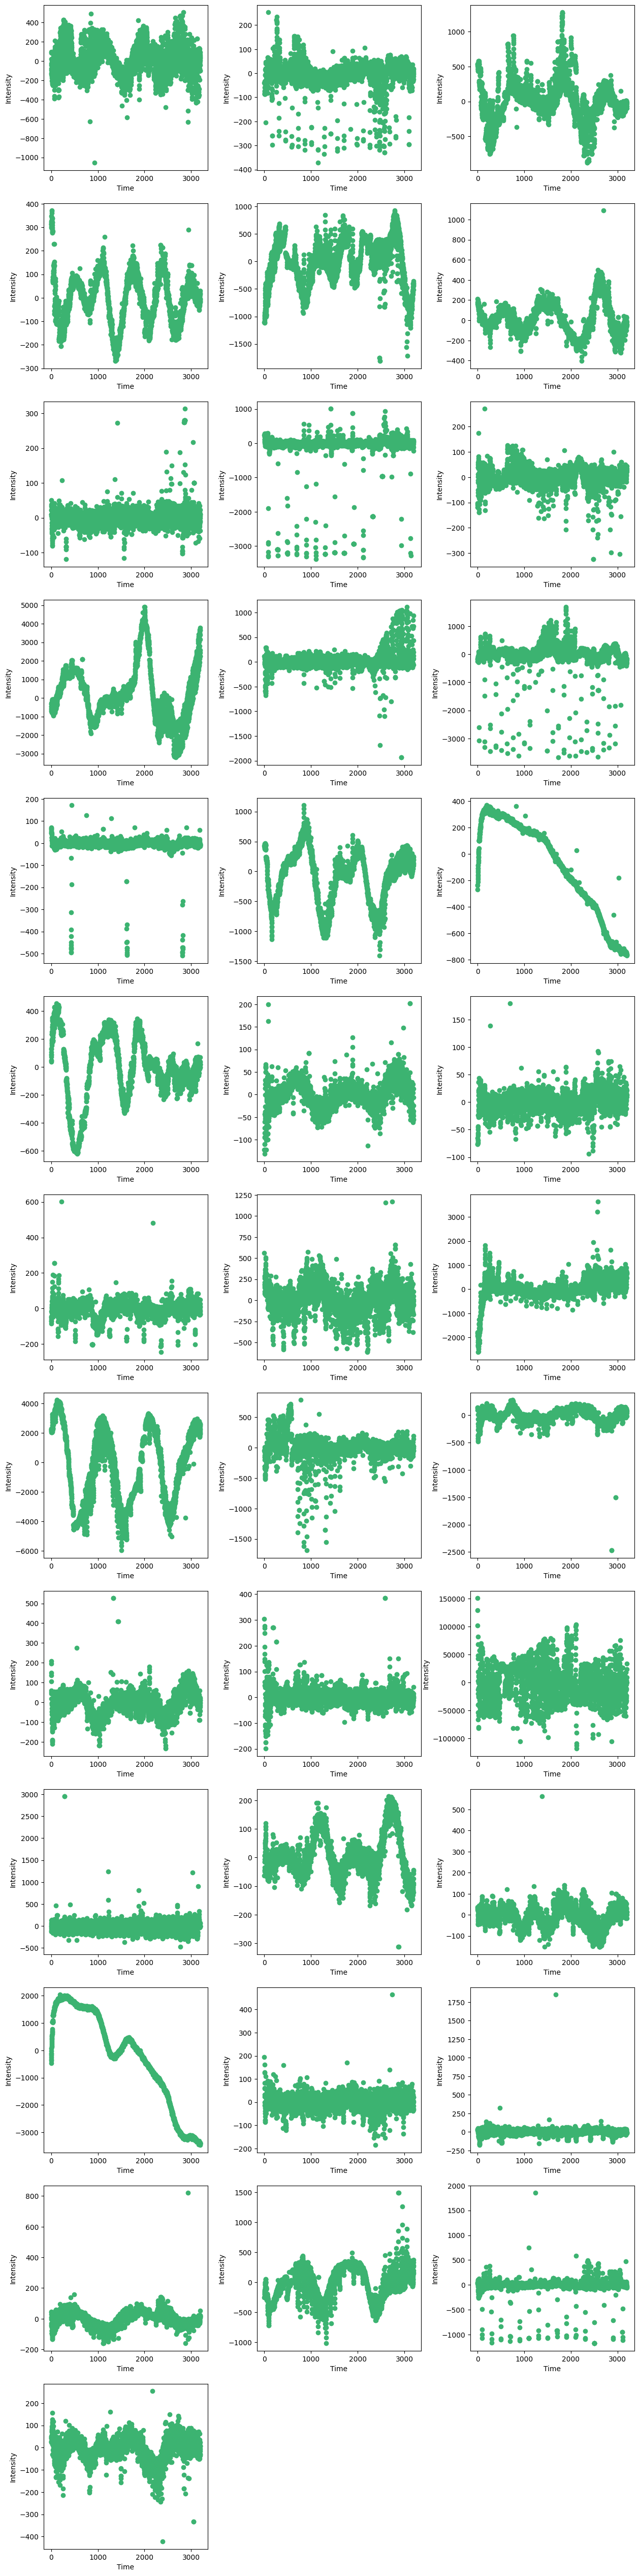

In [14]:
# Visualizing intensities of exoplanet stars with time

plt.figure(figsize=(15,65)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots


for i in range(exoplanet_stars.shape[0]):
    
    plt.subplot(13,3,i+1)

    plt.scatter(np.array(range(exoplanet_stars.shape[1])),exoplanet_stars.iloc[i],color='mediumseagreen')


    plt.xlabel('Time')
    plt.ylabel('Intensity')
   

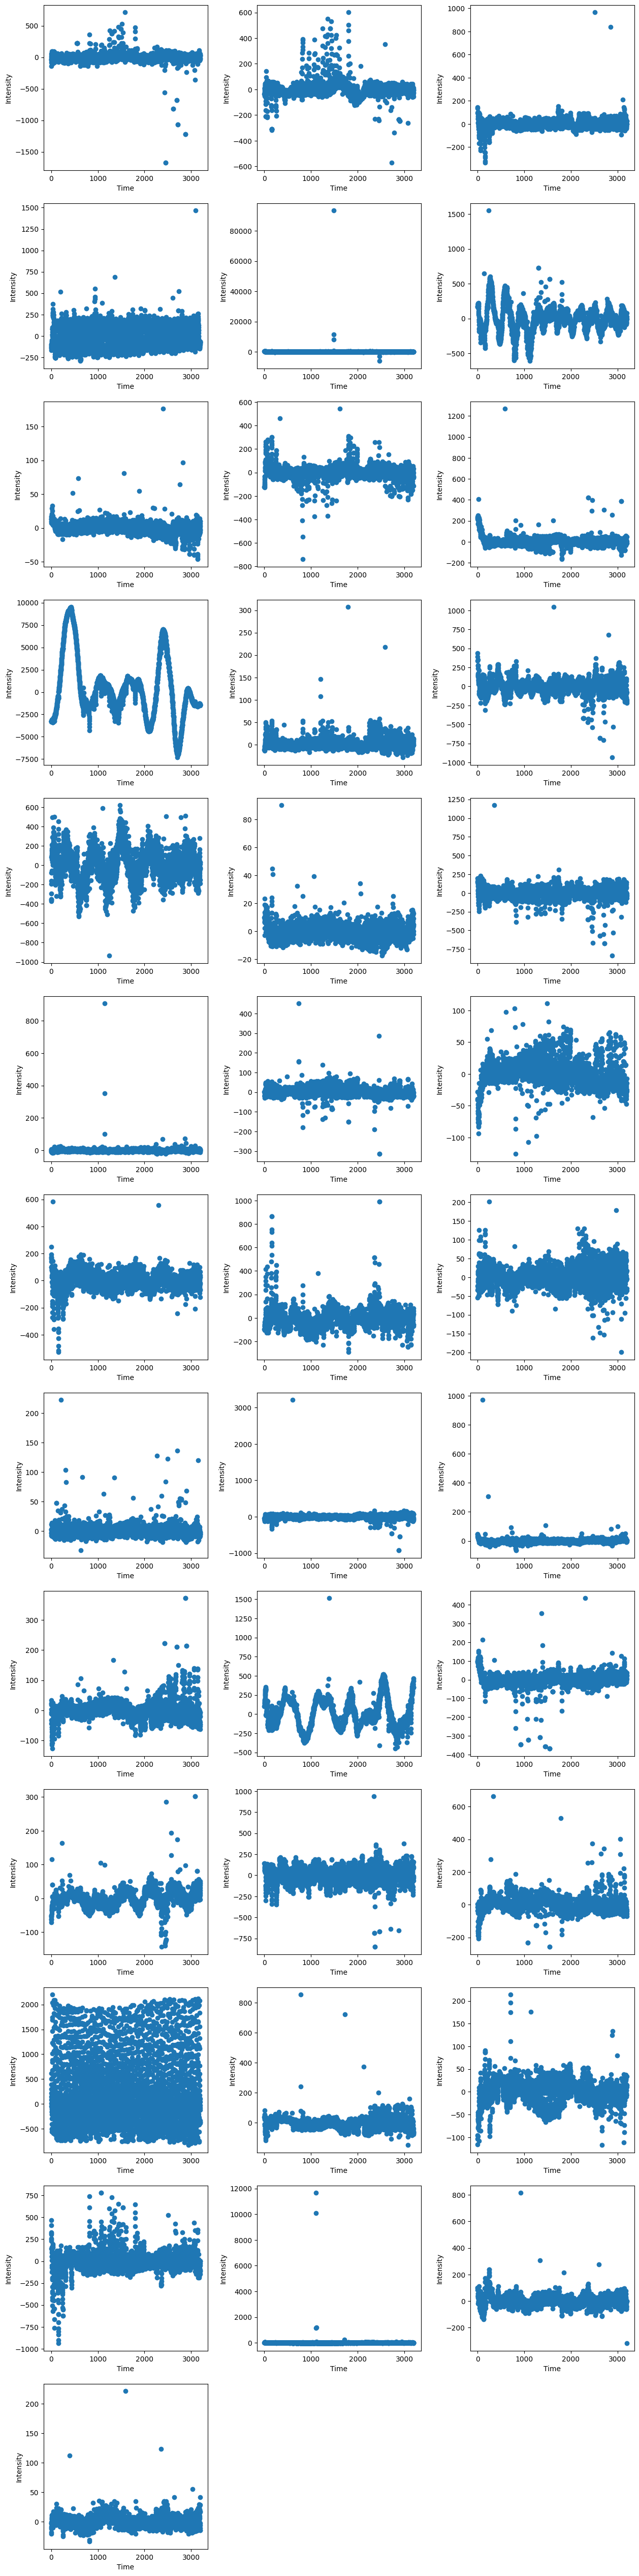

In [15]:
# Visualizing intensities of non exoplanet stars with time

plt.figure(figsize=(15,65)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots


for i in range(37):
    
    plt.subplot(13,3,i+1)

    plt.scatter(np.array(range(non_exoplanet_stars.shape[1])),non_exoplanet_stars.iloc[i])


    plt.xlabel('Time')
    plt.ylabel('Intensity')
   

## Comments
##### 1. Random noise present in both exoplanet and non exoplanets stars. If we zoom in , a lot of it looks sinusoidal.
##### 2. There are upward spikes in intensities which are anomalous, we will fix it in outlier treatment.
##### 3. Some stars give clear exoplanet signatures that are regular dips in the data.
##### 4. Let us closely look at an exoplanet star


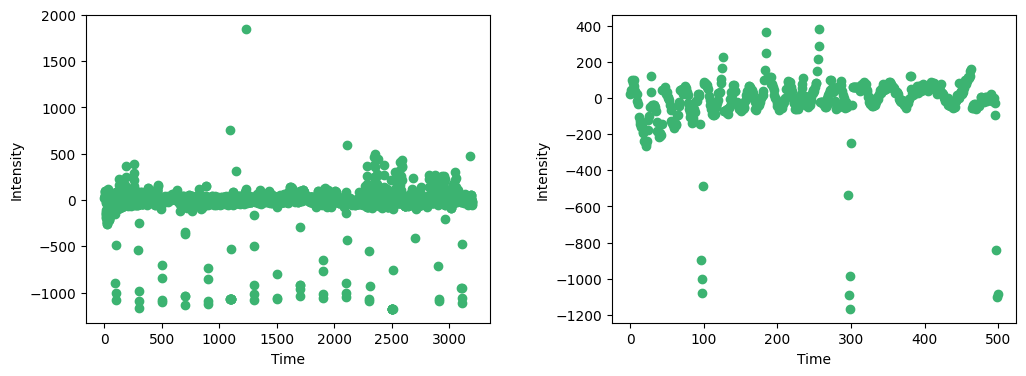

In [16]:
# I will take the 36th exoplanet star

plt.figure(figsize=(12,4)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots

# plotting the 36th exoplanet star
plt.subplot(1,2,1)
plt.scatter(np.array(range(exoplanet_stars.shape[1])),exoplanet_stars.iloc[35],color='mediumseagreen')
plt.xlabel('Time')
plt.ylabel('Intensity')

# zooming the plot
plt.subplot(1,2,2)
plt.scatter(np.array(range(500)),exoplanet_stars.iloc[35,:500],color='mediumseagreen')
plt.xlabel('Time')
plt.ylabel('Intensity');

## Comments 
##### 1. The plot on the right (zoomed) clearly shows sinusoidal noise
##### 2. There are clear signatures of an exoplanet. Periodic dips in intesities are clearly visible.
##### 3. In the left plot there are some upward pulses particularly towards the end of the plot. What could it be? Instrument noise?
##### 4. Let us look at some less obvious exoplanet stars

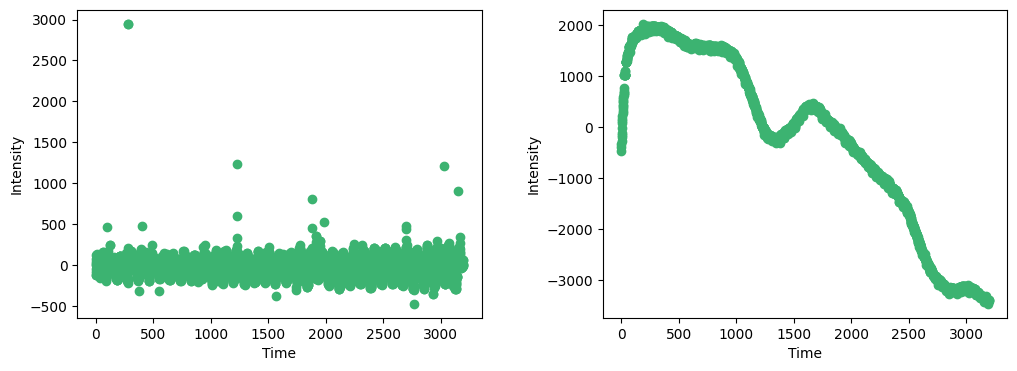

In [17]:
# I will take the 28th and the 31th star

plt.figure(figsize=(12,4)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots

# plotting the 36th exoplanet star
plt.subplot(1,2,1)
plt.scatter(np.array(range(exoplanet_stars.shape[1])),exoplanet_stars.iloc[27],color='mediumseagreen')
plt.xlabel('Time')
plt.ylabel('Intensity')


# zooming the plot
plt.subplot(1,2,2)
plt.scatter(np.array(range(exoplanet_stars.shape[1])),exoplanet_stars.iloc[30],color='mediumseagreen')
plt.xlabel('Time')
plt.ylabel('Intensity');

##### 1. The plot on the left has no clear visible dips. Probably need to zoom in for details.
##### 2. The right plot seems to have 2 transits but has a very unstable signal.
##### 3. No clear signs of exoplanets can be seen, although both have exoplanets.

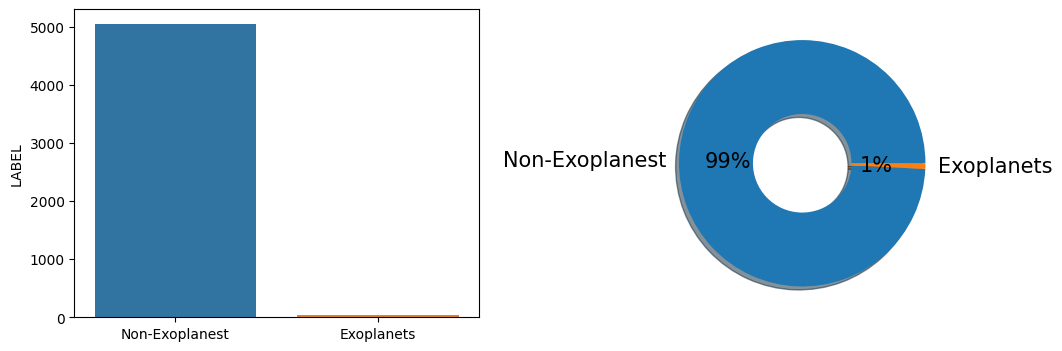

In [18]:
# Looking at the labels

plt.figure(figsize=(12,4)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots

plt.subplot(1,2,1)
sns.barplot(x=['Non-Exoplanest','Exoplanets'],y=labels.value_counts());


plt.subplot(1,2,2)
plt.pie(labels.value_counts(),labels=['Non-Exoplanest','Exoplanets'],autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15});

### Comments
##### 1. The target variable is highly imbalanced . This could hurt our classification model.
##### 2. We will use SMOTE in the later stages to balance the dataset.

## Data Cleaning and Preprocessing

### Outlier removal
##### To remove outliers, I'll take the top 1% of data points and replace them with the mean of the 4 points on either side
##### If index out of bound exception occurs that too will be handled


In [19]:
def outlier_removal(data):
    
    """The function replaces  the top 1% of data points and replace them with the mean of the 4 points on either side.
       If Index out of bound occurs only the mean of the 4 points left to it is taken."""
    
    df=data.copy(deep=True)
    for i in range(df.shape[0]):
        one_percent=df.iloc[i].quantile(0.99)
        for j in range(df.shape[1]):
            if df.iloc[i,j]>one_percent:
                try:
                    df.iloc[i,j]=(df.iloc[i,j-4]+df.iloc[i,j-3]+df.iloc[i,j-2]+df.iloc[i,j-1]+df.iloc[i,j+1]+df.iloc[i,j+2]+df.iloc[i,j+3]+df.iloc[i,j+4])/8
                except Exception as e:
                    df.iloc[i,j]=(df.iloc[i,j-4]+df.iloc[i,j-3]+df.iloc[i,j-2]+df.iloc[i,j-1])/4
    return df

                    

In [20]:
df_cleaned=outlier_removal(df)  # removing outliers

In [21]:
exoplanet_stars_cleaned=df_cleaned[labels==2]  # cleaned exoplanets set
non_exoplanet_stars_cleaned=df_cleaned[labels==1] # cleaned non exoplanet set

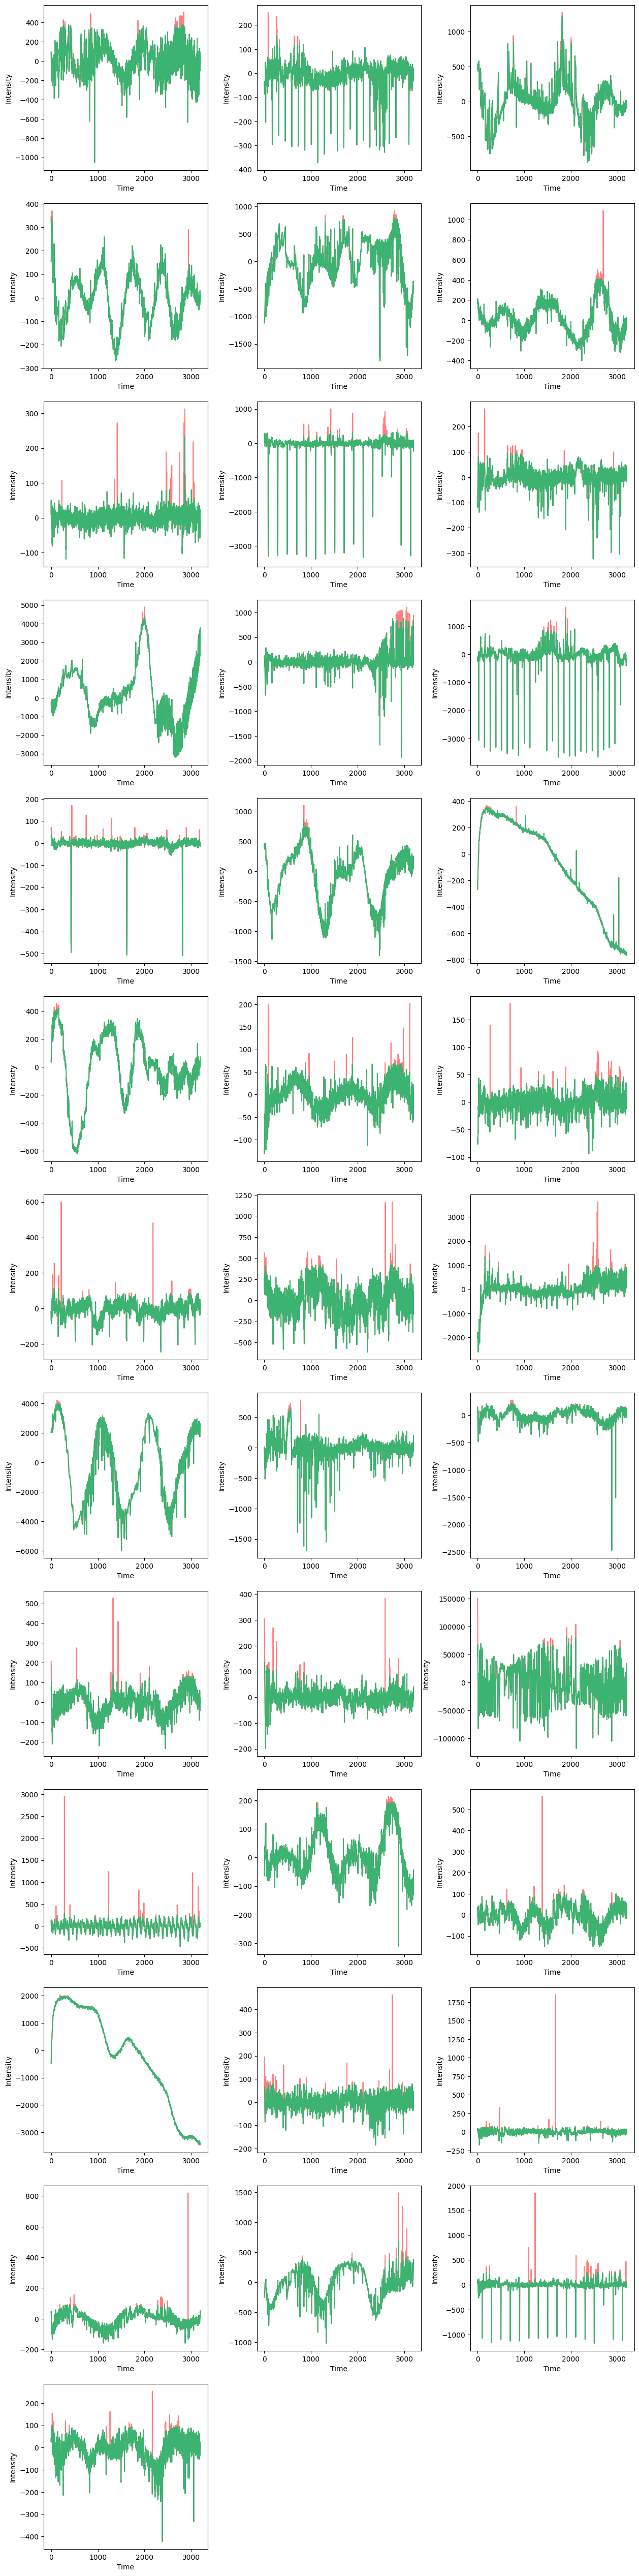

In [22]:
# Visualizing intensities of exoplanet stars with time

plt.figure(figsize=(15,65)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots

# plotting comparison before and after outlier removal
for i in range(exoplanet_stars_cleaned.shape[0]):
    
    plt.subplot(13,3,i+1)
    plt.plot(np.array(range(exoplanet_stars.shape[1])),exoplanet_stars.iloc[i],color='r',alpha=0.5)
    plt.plot(np.array(range(exoplanet_stars_cleaned.shape[1])),exoplanet_stars_cleaned.iloc[i],color='mediumseagreen')
    plt.xlabel('Time')
    plt.ylabel('Intensity')

##### The red lines show the outliers that have been removed.
##### We can clearly see that the outliers have been removed.

### Noise Reduction / Smoothing
##### 1. I will use a median filter with a window size of 41 which is fairly wide.
##### 2.Then I will subtract the output of the median filter from the original data to remove lower-frequency components (such as slow variations or trends) from the data. 
##### 3.This can help highlight the higher-frequency details or variations in the data, as the lower-frequency components have been subtracted out.

In [23]:
def high_pass_filter(df):

    """Apllies median filter to each star data. Then subtracts it from original data to remove low 
       low frequency components """
    
    length = df.shape[0]
    for i in range(length):

        y0 = medfilt(df.iloc[i,:],41)
        for idx in range(len(y0)):
            y0[idx] = df.iloc[i,idx] - y0[idx]
        y1 = savgol_filter(y0,21,4,deriv=0) # remove edge effects
        df.iloc[i]=y1
    
    return df
    

In [24]:
high_pass_filter(df_cleaned)

FLUX.1      FLUX.2      FLUX.3      FLUX.4      FLUX.5      FLUX.6  \
0     104.189957   60.211922   22.086258  -10.258825  -36.923144  -58.034538   
1     -28.939695  -36.951199  -45.022061  -52.824677  -60.060322  -66.459151   
2     102.443786   78.289629   55.999184   35.903915   18.280077    3.348718   
3       0.571608   -0.341695   -0.916205   -0.880554   -0.025835    1.794405   
4    -612.862069 -575.809578 -553.240504 -540.084477 -531.843378 -524.591343   
...          ...         ...         ...         ...         ...         ...   
5082  -86.174139  -92.971314  -93.254036  -88.533723  -80.156368  -69.302543   
5083  395.097636  456.001881  493.647169  510.307251  508.267965  489.827232   
5084   21.827357   41.489980   54.265472   61.584029   64.720439   64.794079   
5085    2.920778    0.751398   -0.303650   -0.554906   -0.275439    0.299161   
5086  108.484008  112.201490  114.443623  115.146160  114.278200  111.842189   

          FLUX.7      FLUX.8      FLUX.9     FLUX.10  ...   FLUX.3188  \
0     -73.748871  -84.250031  -89.749931  -90.488508  ...  -35.562325   
1     -71.780195  -75.811366  -78.369454  -79.300126  ...   -6.239892   
2      -8.724321  -17.828409  -23.908119  -26.963236  ...  -20.685646   
3       4.664158    8.604959   13.575885   19.473557  ...   -2.435439   
4    -514.974755 -500.212253 -478.094724 -446.985309  ...   -3.093797   
...          ...         ...         ...         ...  ...         ...   
5082  -56.987399  -44.060661  -31.206635  -18.944202  ...  130.610870   
5083  457.295059  412.993537  359.256844  298.431240  ...   -0.162047   
5084   62.768919   59.453519   55.501028   51.409188  ...  -36.278451   
5085    0.970773    1.578753    1.999931    2.148609  ...    0.882383   
5086  107.873922  102.442542   95.650536   87.633743  ...   21.774660   

       FLUX.3189   FLUX.3190   FLUX.3191   FLUX.3192  FLUX.3193  FLUX.3194  \
0     -32.721619  -22.229915   -5.798171   13.682438  32.140518  44.324458   
1      -8.948636  -11.648775  -13.798953  -14.739669 -13.693278  -9.763989   
2     -16.270310  -11.560960   -7.734637   -6.203658  -8.615617 -16.853386   
3      -2.161022   -1.417303   -0.363735    0.748471   1.576346   1.685167   
4       0.939766    6.821588   12.865696   16.728447  15.408531   5.246966   
...          ...         ...         ...         ...        ...        ...   
5082  135.243885  134.007284  126.734231  113.472262  94.483289  70.243602   
5083  -18.026467  -35.240297  -49.885112  -59.696635 -62.064738 -54.033442   
5084  -31.051324  -20.987219   -6.673409   10.925972  30.469935  50.240631   
5085    0.440682   -0.342917   -1.401805   -2.629831  -3.881299  -4.970973   
5086   14.413837    6.483882   -1.301998   -8.117905 -13.025257 -14.972778   

      FLUX.3195  FLUX.3196   FLUX.3197  
0     43.802430  22.962387  -26.987936  
1     -1.937867  10.917171   30.051350  
2    -33.035115 -59.514229  -98.879433  
3      0.548451  -2.452040   -8.026301  
4    -18.072897 -59.525377 -124.742464  
...         ...        ...         ...  
5082  41.443861   8.989104  -26.001256  
5083 -32.300918   6.780516   67.204391  
5084  68.143355  81.706544   88.081779  
5085  -5.674071  -5.726271   -4.823707  
5086 -12.796508  -5.219797    9.146693  

[5087 rows x 3197 columns]

In [25]:
exoplanet_stars_cleaned=df_cleaned[labels==2]  # cleaned exoplanets set
non_exoplanet_stars_cleaned=df_cleaned[labels==1]

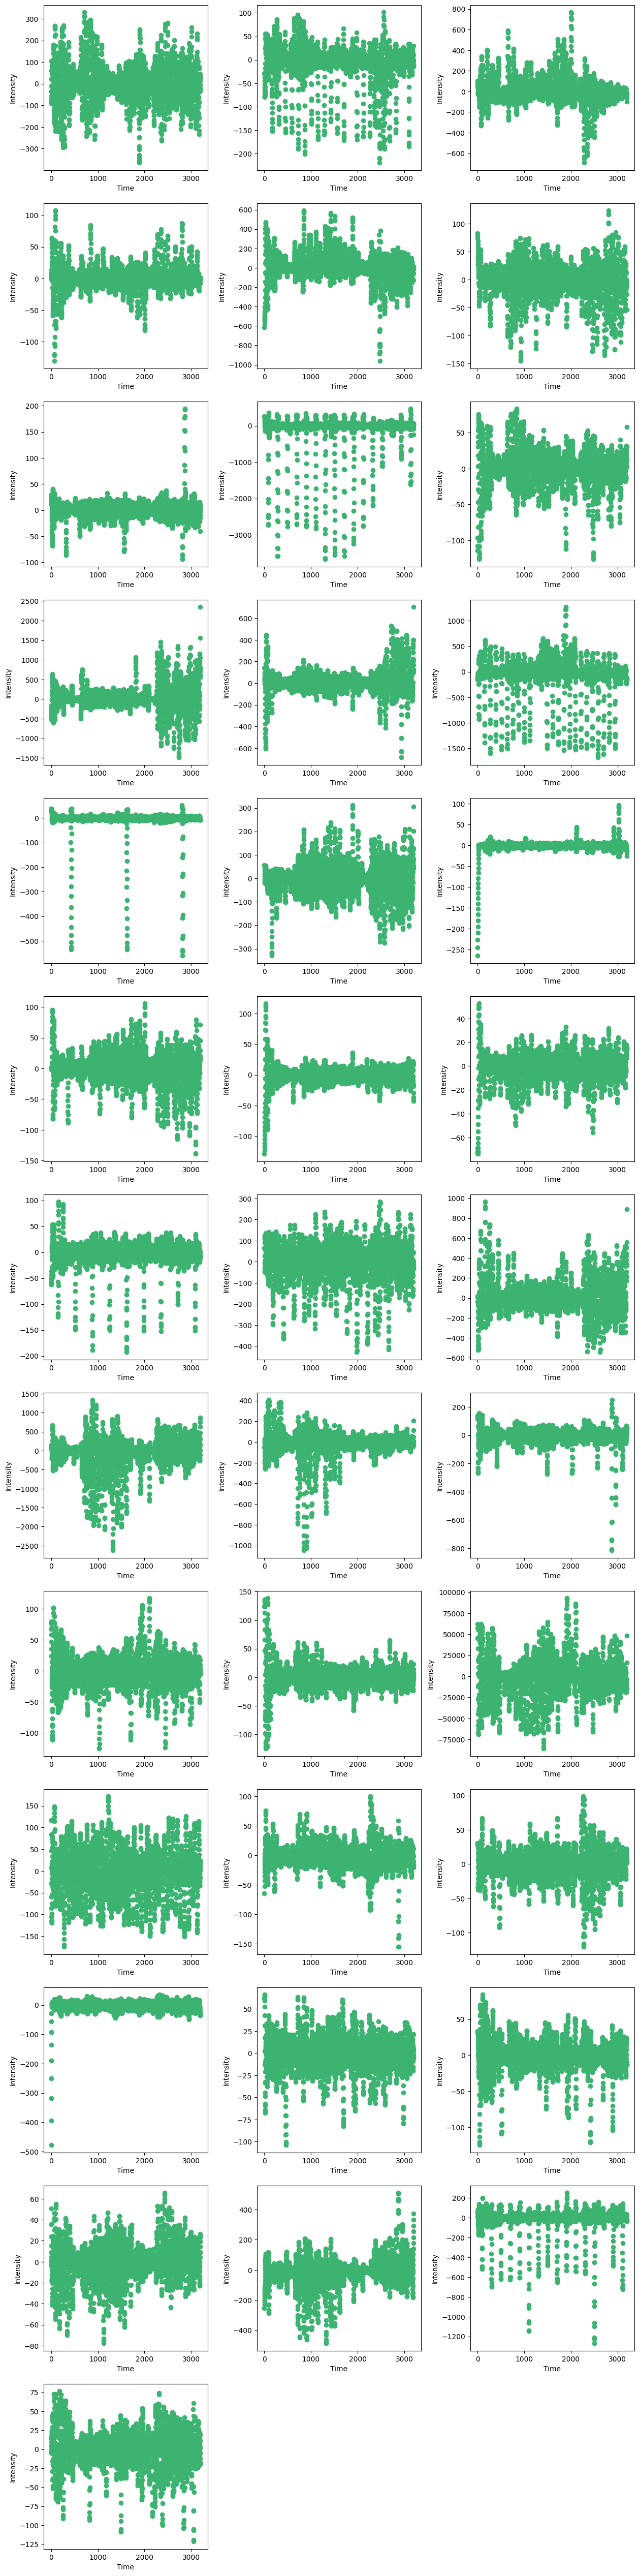

In [26]:
# Visualizing intensities of exoplanet stars with time

plt.figure(figsize=(15,65)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots


for i in range(exoplanet_stars_cleaned.shape[0]):
    
    plt.subplot(13,3,i+1)
    plt.scatter(np.array(range(exoplanet_stars_cleaned.shape[1])),exoplanet_stars_cleaned.iloc[i],color='mediumseagreen')
    plt.xlabel('Time')
    plt.ylabel('Intensity')

## Comments
##### 1. Half of our exoplanets stars are now showing signs of exoplanets.
##### 2. Noise has been reduced to a good extent.

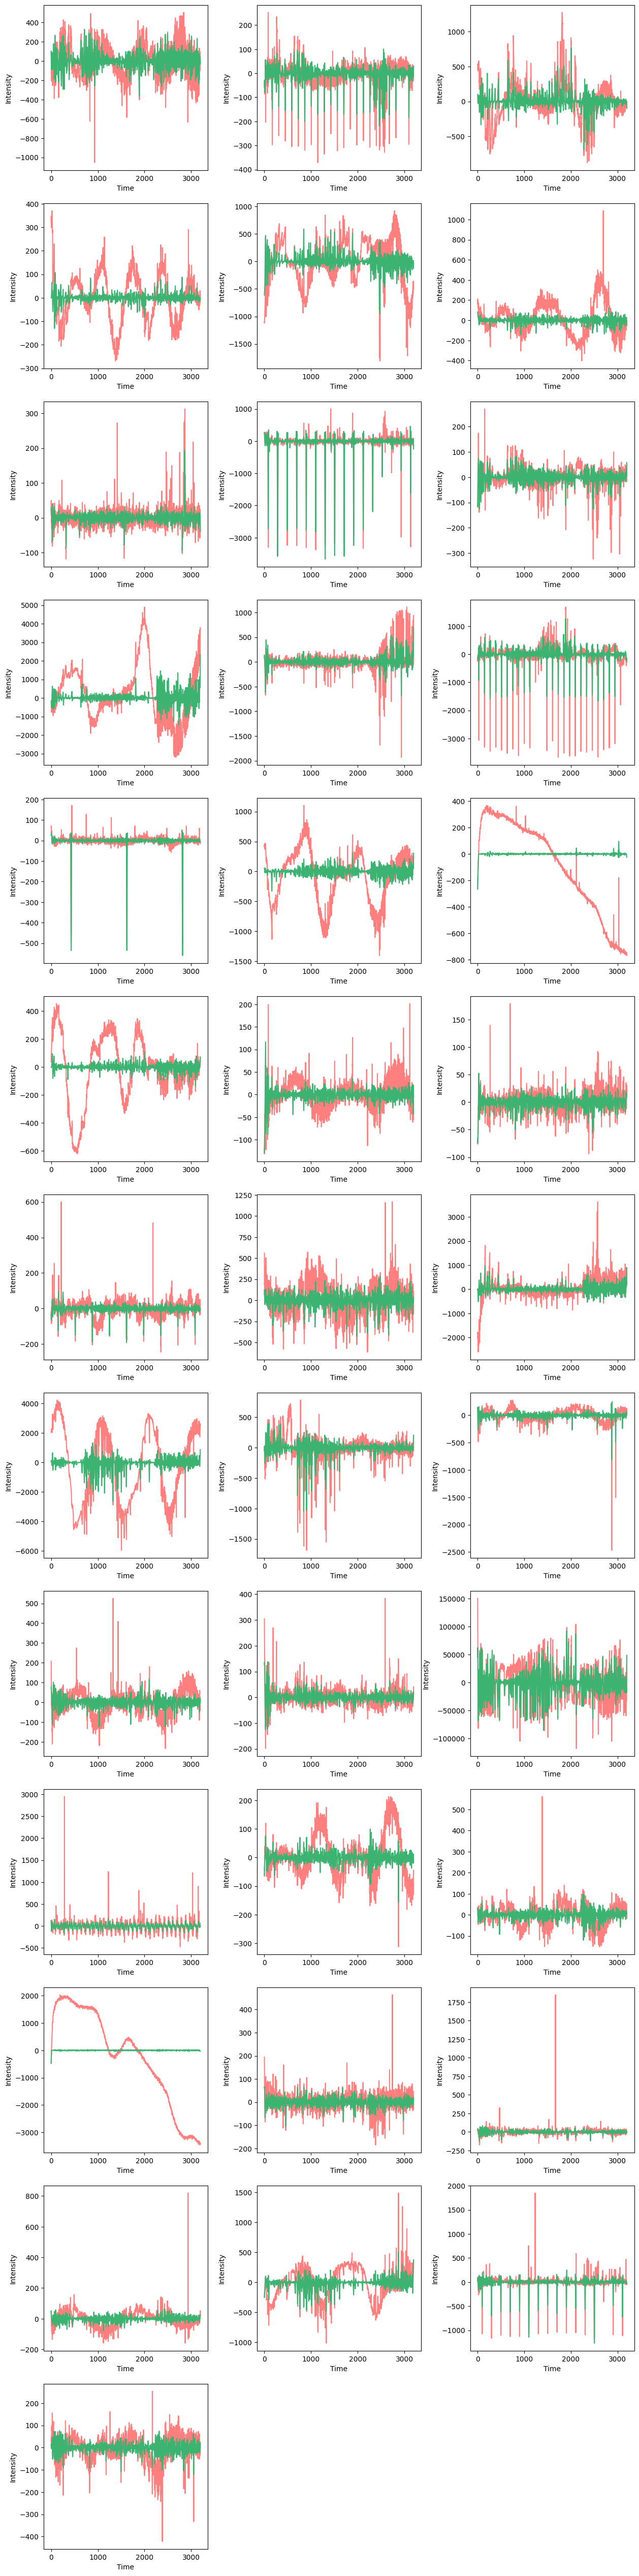

In [27]:
# Visualizing intensities of exoplanet stars with time

plt.figure(figsize=(15,65)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots

# plotting comparison before and after aaplying filters
for i in range(exoplanet_stars_cleaned.shape[0]):
    
    plt.subplot(13,3,i+1)
    plt.plot(np.array(range(exoplanet_stars.shape[1])),exoplanet_stars.iloc[i],color='r',alpha=0.5)
    plt.plot(np.array(range(exoplanet_stars_cleaned.shape[1])),exoplanet_stars_cleaned.iloc[i],color='mediumseagreen')
    plt.xlabel('Time')
    plt.ylabel('Intensity')

#### The comparison shows before and after intensities of the exoplanet stars after applying the high pass filter function.
## Feature Engineering
#### 1. I will use robust scaler here on our  raw data to treat outliers.
#### 2. Will use some other filters to scale the data and reduce noise. After playing around with some filters I have found the best combination to be:
###### a.) Fast Fourier Transform (FFT) for noise reduction
###### b.) Savitzky-Golay filter for smoothening the time series signal.
###### c.) Normalization to handle the variation in intensities and bring whole data to a similar scale.
###### d.) Robust filter to handle outliers

In [28]:
df=pd.read_csv('exoTrain.csv') # getting raw data again

In [29]:
def reset(train,test):
    
    """Resets the training and testing data. For model training I will use some other noise reduction
       techniques other than those used in visualization"""
    
    train_X = df.drop('LABEL', axis=1)
    train_y = df['LABEL']
    test_X = df2.drop('LABEL', axis=1)
    test_y = df2['LABEL']
    
    # changing labels from [1,2] => [0,1]
    label_dict={1:0,2:1}
    train_y=train_y.map(lambda x : label_dict[x])
    test_y=test_y.map(lambda x : label_dict[x])
    
    return train_X,train_y,test_X,test_y

In [30]:
def robust(df1,df2):
    
    """ This scaler reoves outliers based on the inter quartile range method.
        After robust scaler I will use Standard scaler for further pre processing.
    """
    scaler = RobustScaler()
    train_X = scaler.fit_transform(df1)
    test_X = scaler.transform(df2)
    return train_X,test_X

In [31]:
def norm(df1,df2):
    """ Normalisation transform features to be on a similar scale.
        The intensities have different ranges, so bringing them to a similar scale 
        will help our model learn better.
    """
    train_X = normalize(df1)
    test_X = normalize(df2)
    return train_X,test_X

In [32]:
def fourier(df1,df2):
    """ I will use Fast Fourier Transform for noise reduction.
    """
    train_X = np.abs(np.fft.fft(df1, axis=1))
    test_X = np.abs(np.fft.fft(df2, axis=1))
    return train_X,test_X

In [33]:
def savgol(df1,df2):
    """ This filter is used to soothen out the signal"""
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

In [34]:
# Filtering the data
X_train,y_train,X_test,y_test = reset(df,df2) # getting raw data

# applying the above discussed filters

# FFT application
X_train,X_test = fourier(X_train,X_test) 

# Savitzky-Golay filter
X_train,X_test = savgol(X_train,X_test)

# Normalization
X_train,X_test = norm(X_train,X_test)

# Robust Filter
X_train,X_test = robust(X_train,X_test)

## Model Selection

In [35]:
# defining different classification models
model_SVM = SVC()
model_KNN= KNeighborsClassifier()
model_DT= DecisionTreeClassifier()
model_RF=RandomForestClassifier()
model_XGB=XGBClassifier()

### Using cross validation(5 folds)

In [36]:
# Using 5 fold cross validation technique to get the performance metrics of all the models

# SVM
svm_pred = cross_val_predict(model_SVM, X_train, y_train, cv=5)

# KNN
knn_pred = cross_val_predict(model_KNN, X_train, y_train, cv=5)

# Decision Tree
dt_pred = cross_val_predict(model_DT, X_train, y_train, cv=5)

# Random Forest
rf_pred = cross_val_predict(model_RF, X_train, y_train, cv=5)

# XG Boost
xgb_pred = cross_val_predict(model_XGB, X_train, y_train, cv=5)

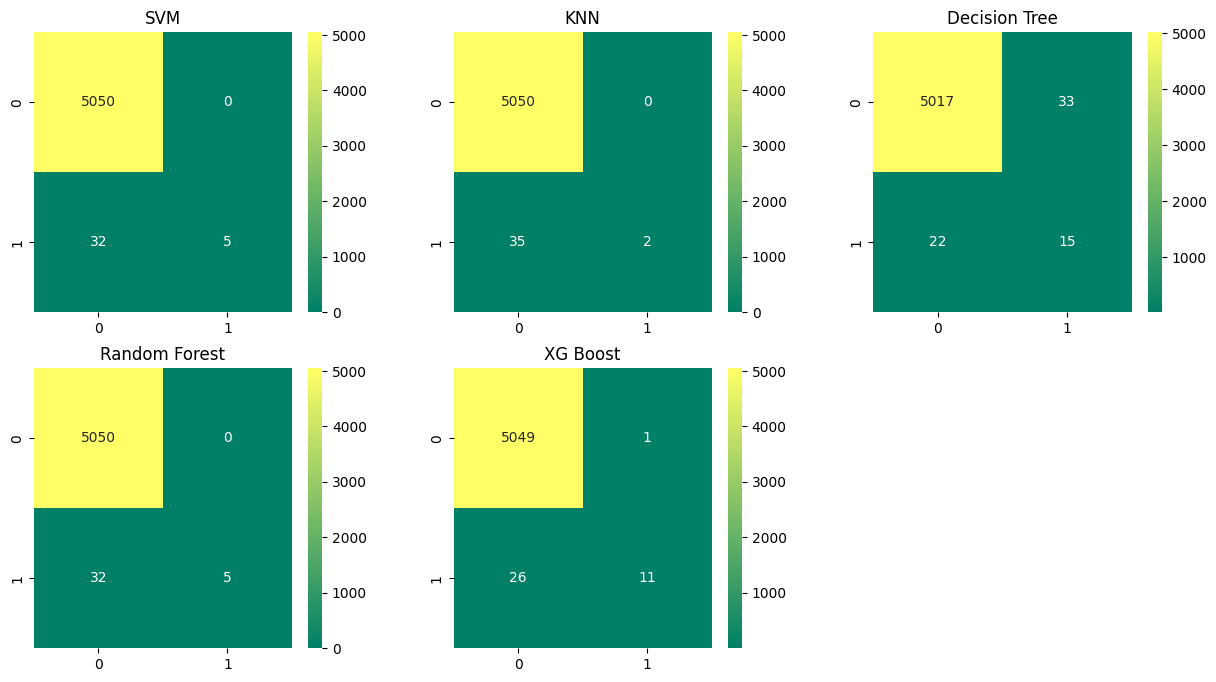

In [37]:
# confusion matrices
plt.figure(figsize=(15,8)) # defining figure size
plt.subplots_adjust(wspace=0.3) # giving space between plots

scores=[svm_pred,knn_pred,dt_pred,rf_pred,xgb_pred]
title=["SVM","KNN","Decision Tree",'Random Forest','XG Boost']
for i in range(5):
    conf_mat = confusion_matrix(y_train,scores[i])
    plt.subplot(2,3,i+1,title=title[i])
    sns.heatmap(conf_mat,annot=True,cmap="summer",fmt = "d",linecolor="k")
 
    

## Comments
##### 1. Decision Tree Classifier gives the best true negative score which is the most important metric in our dataset.
##### 2. True negative score shows how many exoplanet stars has our model correctly identified.
##### 3.I will go ahead with Decision Tree.

## Model Training

In [38]:
# Training Final Model
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Predicting on test data
y_pred=classifier.predict(X_test)

In [40]:
# printing performance metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       565
           1       0.71      1.00      0.83         5

    accuracy                           1.00       570
   macro avg       0.86      1.00      0.92       570
weighted avg       1.00      1.00      1.00       570



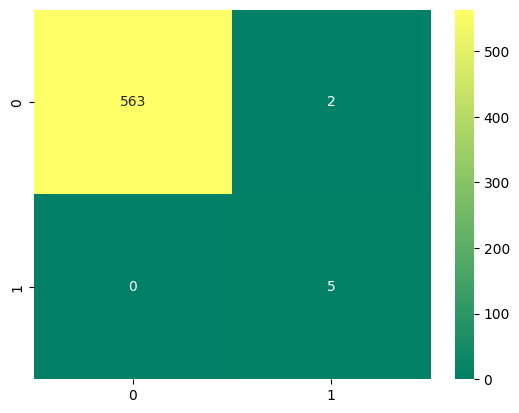

In [41]:
# printing confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="summer",fmt = "d",linecolor="k");

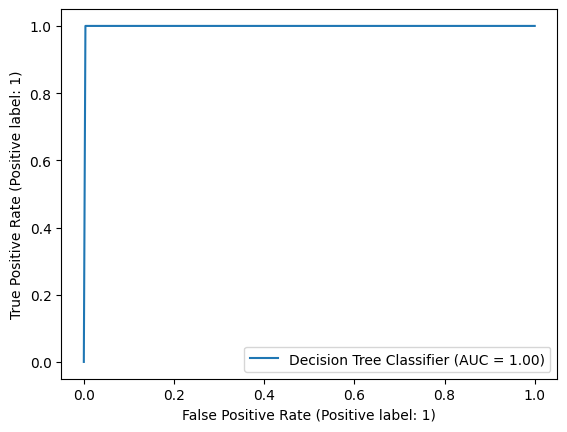

In [42]:
RocCurveDisplay.from_predictions(y_test,y_pred,name="Decision Tree Classifier");

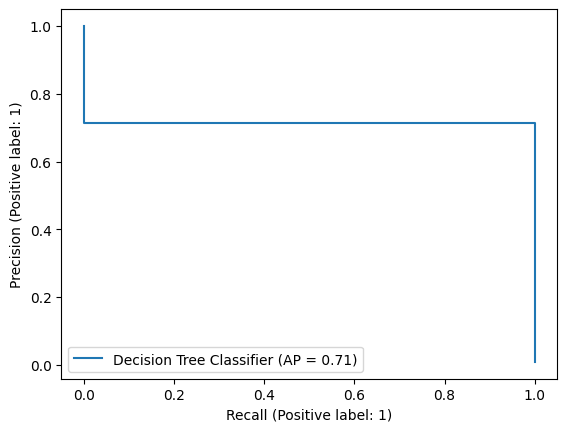

In [43]:
PrecisionRecallDisplay.from_predictions(y_test,y_pred,name="Decision Tree Classifier");

## Comments
##### 1. The model works excellent on test data as well as training data.
##### 2. The performance metrics scores are promising
##### 3. I have not used SMOTE till now for balancing of dataset.
##### 4. I tried tuning hyper parameters but the default model works the best.
## SMOTE

In [44]:
# SMOTE for balancing target variable
smote= SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.3) # splitting into training and validation data

# concatenating validation and test data as number of exoplanet stars in test data are very few
X_test,y_test=np.concatenate((X_test, X_val), axis=0),np.concatenate((y_test, y_val), axis=0)

In [45]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Predicting on test data
y_pred=classifier.predict(X_test)

In [47]:
# printing performance metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2078
           1       0.98      1.00      0.99      1522

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600



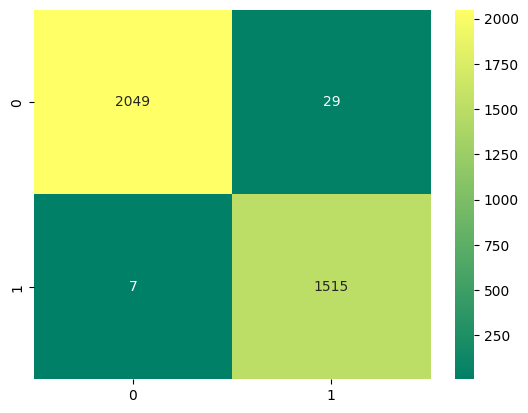

In [48]:
# printing confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="summer",fmt = "d",linecolor="k");

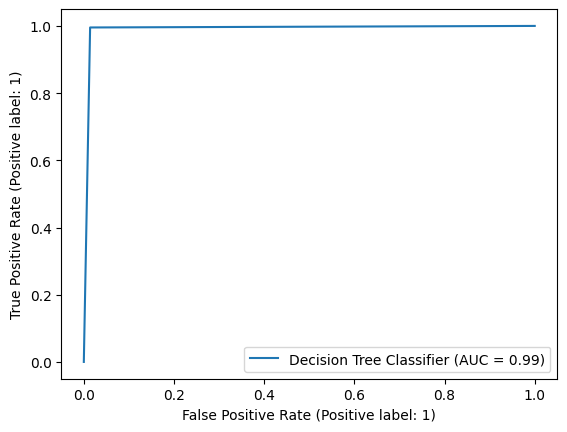

In [49]:
RocCurveDisplay.from_predictions(y_test,y_pred,name="Decision Tree Classifier");

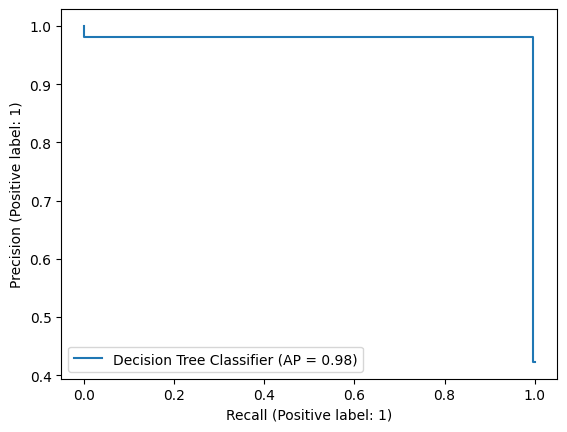

In [50]:
PrecisionRecallDisplay.from_predictions(y_test,y_pred,name="Decision Tree Classifier");

## Comments
##### 1. After using SMOTE the results have improved significantly.
##### 2. The f1 score of minority class has improved significatnly.

## Conclusion 

##### 1. Decision tree has performed the best on our dataset after some feature engineering.
##### 2. The metric scores are promising on both training as well as test data.
##### 3. Due to imbalance in data I used an oversampling technique known as SMOTE.
##### 4. Results have further improved after using SMOTE.


## Future Work
###### 1. The dataset is small we can collect  more data.
###### 2. More data of the minority class can be added to improve the imbalance in data.
###### 3. If the dataset is large enough we can try undersampling instead of oversampling.
###### 4. Further noise reduction and filtering of the data can be done
